In [493]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1. baseline_demographics.csv
1. one-hot encoding: gender, education, mariral_status, race
2. Ordinal label Encoding: income_statisfaction, income_lastyear
3. Keep the Brighten-v2
 

In [604]:
df_bd = pd.read_csv('baseline_demographics.csv')
df_bd

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,gender,education,working,income_satisfaction,income_lastyear,marital_status,race,age,heard_about_us,device,startdate,study_arm,study
0,0,1,1,BLUE-00048,Male,Graduate Degree,Yes,NaN,NaN,Single,Asian,31.0,NaN,iPhone,2014-07-11 10:45:00,iPST,Brighten-v1
1,1,2,1,BLUE-00049,Male,Graduate Degree,No,NaN,NaN,Married/Partner,Asian,47.0,NaN,Android,2014-07-31 21:21:00,iPST,Brighten-v1
2,2,3,1,BLUE-00050,Male,High School,Yes,NaN,NaN,Separated/Widowed/Divorced,African-American/Black,55.0,NaN,iPhone,2014-08-02 10:46:00,iPST,Brighten-v1
3,3,4,1,BLUE-00051,Male,University,No,NaN,NaN,Separated/Widowed/Divorced,Non-Hispanic White,73.0,NaN,iPhone,2014-08-02 17:50:00,iPST,Brighten-v1
4,4,5,1,BLUE-00052,Male,University,No,NaN,NaN,Single,Non-Hispanic White,51.0,NaN,iPhone,2014-08-04 09:07:00,iPST,Brighten-v1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2188,2189,2,YELLOW-00260,Male,University,Yes,Can't make ends meet,"< $20,000",Single,Non-Hispanic White,40.0,Craigslist,Android,2014-12-07 10:44:00,HealthTips,Brighten-v1
2174,2189,2190,2,YELLOW-00261,Female,Community College,No,Can't make ends meet,"40,000-60,000",Separated/Widowed/Divorced,Non-Hispanic White,47.0,Craigslist,Android,2014-12-05 18:07:00,HealthTips,Brighten-v1
2175,2190,2191,2,YELLOW-00262,Female,High School,Yes,Can't make ends meet,"< $20,000",Single,African-American/Black,20.0,friend/colleague,Android,2014-12-06 20:33:00,HealthTips,Brighten-v1
2176,2191,2192,2,YELLOW-00263,Female,High School,No,Can't make ends meet,"< $20,000",Single,Hispanic/Latino,23.0,Craigslist,Android,2014-12-07 01:12:00,HealthTips,Brighten-v1


<AxesSubplot:xlabel='education', ylabel='Count'>

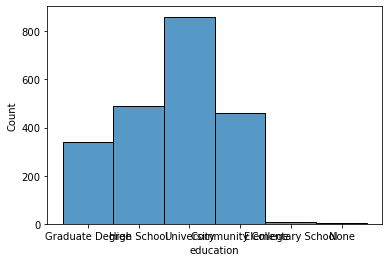

In [605]:
sns.histplot(data = df_bd, x = 'education')

<AxesSubplot:xlabel='income_satisfaction', ylabel='Count'>

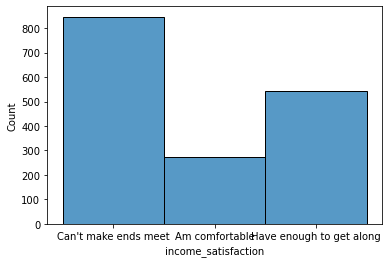

In [606]:
sns.histplot(data = df_bd, x = 'income_satisfaction')

<AxesSubplot:xlabel='marital_status', ylabel='Count'>

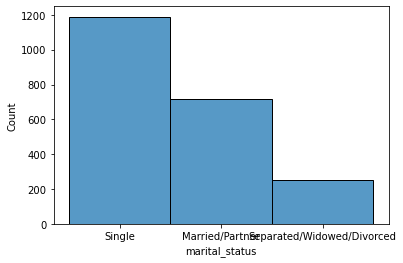

In [607]:
sns.histplot(data = df_bd, x = 'marital_status')

Non-Hispanic White                        1136
Hispanic/Latino                            552
African-American/Black                     220
Asian                                      148
More than one                               69
American Indian/Alaskan Native              20
Other                                        9
Native Hawaiian/other Pacific Islander       5
Name: race, dtype: int64

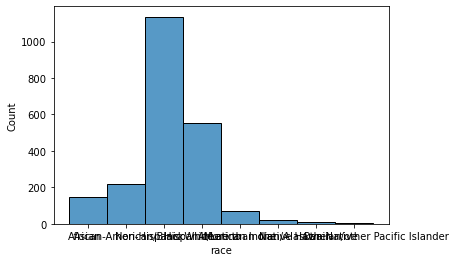

In [608]:
sns.histplot(data = df_bd, x = 'race')
df_bd['race'].value_counts()

In [609]:
df_bd.loc[df_bd['age'] == 1991,'age'] = 25 #deal with outlier: start_date - 1991
df_bd.drop(columns = ['Unnamed: 0', 'ROW_ID', 'ROW_VERSION'], inplace = True)
df_bd.drop(columns = ['heard_about_us', 'device', 'study_arm'], inplace = True)
df_bd.describe()

,age
count,2159.000000
mean,33.464104
std,11.112429
min,16.000000
25%,25.000000
50%,31.000000
75%,40.000000
max,76.000000


In [610]:
# df_bd['study'].value_counts()
# df_bd['income_satisfaction'].unique()
# df_bd['income_lastyear'].unique()
# df_bd['gender'].value_counts()
# df_bd['education'].unique()
df_bd['race'].unique()

array(['Asian', 'African-American/Black', 'Non-Hispanic White',
       'Hispanic/Latino', 'More than one',
       'American Indian/Alaskan Native', 'Other', nan,
       'Native Hawaiian/other Pacific Islander'], dtype=object)

In [611]:
satisfaction_dict = {'Can\'t make ends meet': 1,'Am comfortable': 2,'Have enough to get along': 3}
income_dict = {'< $20,000': 1,'40,000-60,000': 2,'20,000-40,000': 3, '60,000-80,000':4, '80,000-100,000':5, '100,000+':6}
working_dict = {'Yes':1, 'No':0}

df_bd["working"] = df_bd.working.map(working_dict) #nan
df_bd['income_satisfaction'] = df_bd.income_satisfaction.map(satisfaction_dict)
df_bd['income_lastyear'] = df_bd.income_lastyear.map(income_dict)

# pd.get_dummies(df_bd,columns=["gender"])
df_bd = pd.get_dummies(df_bd,prefix=["gen","martial","edu", 'race'],columns=["gender","marital_status", 'education', 'race'])

In [612]:
df_bd.columns

Index(['participant_id', 'working', 'income_satisfaction', 'income_lastyear',
       'age', 'startdate', 'study', 'gen_Female', 'gen_Male',
       'martial_Married/Partner', 'martial_Separated/Widowed/Divorced',
       'martial_Single', 'edu_Community College', 'edu_Elementary School',
       'edu_Graduate Degree', 'edu_High School', 'edu_None', 'edu_University',
       'race_African-American/Black', 'race_American Indian/Alaskan Native',
       'race_Asian', 'race_Hispanic/Latino', 'race_More than one',
       'race_Native Hawaiian/other Pacific Islander',
       'race_Non-Hispanic White', 'race_Other'],
      dtype='object')

In [613]:
df_bd = df_bd[df_bd['study'] == 'Brighten-v2']

In [614]:
def fillna_mean(df):
    for col in df.columns:
        if df[col].isna().sum():
            df[col].fillna(value = df[col].mean(), inplace = True)
    return df

In [615]:

df_bd = fillna_mean(df_bd)
df_bd

,participant_id,working,income_satisfaction,income_lastyear,age,startdate,study,gen_Female,gen_Male,martial_Married/Partner,...,edu_None,edu_University,race_African-American/Black,race_American Indian/Alaskan Native,race_Asian,race_Hispanic/Latino,race_More than one,race_Native Hawaiian/other Pacific Islander,race_Non-Hispanic White,race_Other
213,EN00033,1.0,3.0,6.0,52.0,2016-08-12 12:41:00,Brighten-v2,0,1,0,...,0,1,0,0,0,0,0,0,1,0
214,EN00034,1.0,3.0,4.0,32.0,2016-08-12 12:58:00,Brighten-v2,1,0,1,...,0,1,0,0,0,0,0,0,1,0
215,EN00035,0.0,2.0,2.0,57.0,2016-08-12 15:41:00,Brighten-v2,0,1,0,...,0,1,0,0,0,0,0,0,1,0
216,EN00036,1.0,3.0,3.0,55.0,2016-08-13 10:24:00,Brighten-v2,1,0,1,...,0,1,0,0,0,0,0,0,1,0
217,EN00037,0.0,2.0,6.0,34.0,2016-08-15 09:04:00,Brighten-v2,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,ES05078,0.0,2.0,4.0,38.0,2017-01-23 10:48:00,Brighten-v2,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1277,ES05079,0.0,2.0,1.0,31.0,2017-01-23 19:39:00,Brighten-v2,0,1,1,...,0,1,0,0,0,1,0,0,0,0
1278,ES05080,1.0,1.0,1.0,32.0,2017-01-29 20:45:00,Brighten-v2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1279,ES05081,0.0,1.0,1.0,33.0,2017-02-01 05:52:00,Brighten-v2,1,0,1,...,0,0,0,0,0,1,0,0,0,0


## 2.baseline_phq9_survey.csv
1. sum 9 phq to get the final score
2. level 1: 0-5, level 2: 6-10, level 3: 11-15, level 4: 16-20, level 4 20-25, level 5: >25

In [616]:
df_bp9 = pd.read_csv('baseline_phq9_survey.csv')
df_bp9

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,study,baselinePHQ9date
0,0,1,1,BLUE-00048,1,2,2,2,1,2,1,0,0,Brighten-v1,2014-07-11
1,1,2,1,BLUE-00049,1,1,2,1,3,1,1,0,0,Brighten-v1,2014-07-31
2,2,3,1,BLUE-00050,2,1,2,2,0,2,2,0,0,Brighten-v1,2014-08-02
3,3,4,1,BLUE-00051,1,1,0,1,1,1,0,0,0,Brighten-v1,2014-08-02
4,4,5,1,BLUE-00052,2,2,3,3,2,3,2,0,0,Brighten-v1,2014-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1914,1915,1,EN05162,0,1,1,1,1,2,2,1,2,Brighten-v2,2016-10-15
1900,1915,1916,1,EN05149,0,1,1,1,1,1,1,1,0,Brighten-v2,2016-10-03
1901,1916,1917,1,EN00342,1,1,1,1,0,1,1,1,0,Brighten-v2,2016-09-08
1902,1917,1918,1,EN05241,2,1,3,3,2,2,1,0,0,Brighten-v2,2016-11-29


In [617]:
df_bp9.drop(columns = ['Unnamed: 0', 'ROW_ID', 'ROW_VERSION'], inplace = True)
df_bp9.describe()

,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,1.705882,1.723214,2.070903,2.004202,1.719538,1.835609,1.640231,0.980042,0.458508
std,0.822469,0.847591,0.913905,0.835990,0.967749,0.935533,0.949751,0.960940,0.753594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [618]:
def sum_phq9(df):
    cols = ['phq9_1','phq9_2','phq9_3', 'phq9_4', 'phq9_5', 'phq9_6','phq9_7','phq9_8','phq9_9']
    df['phq9_sum'] = df[cols].sum(axis = 1)
    return df

def score_to_5level(df):
    bins = [-1, 5, 10, 15, 20, np.inf]
    names = ['1', '2', '3', '4', '5']
    df['phq9_level'] = pd.cut(df['phq9_sum'], bins, labels=names)
    df['phq9_level'].replace(names,
                        [1, 2,3, 4, 5], inplace=True)

    return df

In [619]:
df_bp9 = sum_phq9(df_bp9)
df_bp9 = score_to_5level(df_bp9)
df_bp9 = df_bp9[df_bp9['study'] == 'Brighten-v2']

df_bp9

,participant_id,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,study,baselinePHQ9date,phq9_sum,phq9_level
957,EN00573,3,3,2,3,3,2,2,2,1,Brighten-v2,2016-11-13,21,5
958,EN05114,2,1,3,0,2,3,0,2,0,Brighten-v2,2016-09-04,13,3
959,EN00115,1,2,1,1,1,1,2,1,0,Brighten-v2,2016-08-29,10,2
960,EN00387,2,2,2,2,1,1,1,2,0,Brighten-v2,2016-10-25,13,3
961,EN05143,2,2,2,3,2,2,1,0,0,Brighten-v2,2016-09-19,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,EN05162,0,1,1,1,1,2,2,1,2,Brighten-v2,2016-10-15,11,3
1900,EN05149,0,1,1,1,1,1,1,1,0,Brighten-v2,2016-10-03,7,2
1901,EN00342,1,1,1,1,0,1,1,1,0,Brighten-v2,2016-09-08,7,2
1902,EN05241,2,1,3,3,2,2,1,0,0,Brighten-v2,2016-11-29,14,3


In [620]:
df_bp9.describe()

,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,phq9_sum,phq9_level
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,1.690602,1.723337,2.053854,2.009504,1.722281,1.845829,1.680042,1.031679,0.529039,14.286167,3.254488
std,0.829138,0.853741,0.912825,0.832045,0.946765,0.917006,0.946817,0.968341,0.814737,5.442322,1.085980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,10.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,14.000000,3.000000
75%,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,18.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,27.000000,5.000000


In [621]:
df_bp9 = df_bp9.add_prefix('base_')
df_bp9 =df_bp9.rename(columns={"base_participant_id": "participant_id", "base_study": "study"})
df_bp9

,participant_id,base_phq9_1,base_phq9_2,base_phq9_3,base_phq9_4,base_phq9_5,base_phq9_6,base_phq9_7,base_phq9_8,base_phq9_9,study,base_baselinePHQ9date,base_phq9_sum,base_phq9_level
957,EN00573,3,3,2,3,3,2,2,2,1,Brighten-v2,2016-11-13,21,5
958,EN05114,2,1,3,0,2,3,0,2,0,Brighten-v2,2016-09-04,13,3
959,EN00115,1,2,1,1,1,1,2,1,0,Brighten-v2,2016-08-29,10,2
960,EN00387,2,2,2,2,1,1,1,2,0,Brighten-v2,2016-10-25,13,3
961,EN05143,2,2,2,3,2,2,1,0,0,Brighten-v2,2016-09-19,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,EN05162,0,1,1,1,1,2,2,1,2,Brighten-v2,2016-10-15,11,3
1900,EN05149,0,1,1,1,1,1,1,1,0,Brighten-v2,2016-10-03,7,2
1901,EN00342,1,1,1,1,0,1,1,1,0,Brighten-v2,2016-09-08,7,2
1902,EN05241,2,1,3,3,2,2,1,0,0,Brighten-v2,2016-11-29,14,3


<AxesSubplot:xlabel='phq9_sum', ylabel='Count'>

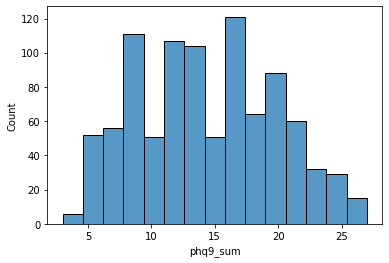

In [596]:
sns.histplot(data=df_bp9, x="phq9_sum")

<AxesSubplot:xlabel='phq9_level', ylabel='Count'>

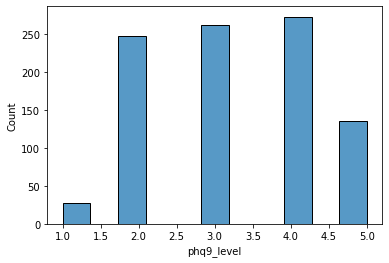

In [597]:
sns.histplot(data=df_bp9, x="phq9_level")

## 3. phq9.csv
1. some participants take several phq9 tests within a week, use avg score to present this week, how about the test date
2. Maximum 12 weeks
3. does it have to be like this?
4. Time span of the test

In [632]:
df_p9 = pd.read_csv('phq9.csv')
df_p9.describe()

,Unnamed: 0,ROW_ID,ROW_VERSION,week,sum_phq9,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9
count,4817.000000,4817.000000,4817.000000,4817.000000,4817.000000,4817.000000,4816.000000,4814.000000,4814.000000,4814.000000,4813.000000,4811.000000,4810.000000,4809.000000
mean,2414.748599,2415.748599,1.444675,5.166286,9.541831,1.172929,1.234842,1.406938,1.514749,1.179684,1.070434,1.035544,0.480873,0.371387
std,1400.527571,1400.527571,0.496981,3.475107,5.808614,0.803200,0.828791,1.010007,0.932642,1.015931,0.964361,0.938540,0.780925,0.726361
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1204.000000,1205.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2408.000000,2409.000000,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,3612.000000,3613.000000,2.000000,8.000000,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,4874.000000,4875.000000,2.000000,12.000000,27.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [633]:
df_p9_date = df_p9[['phq9Date','participant_id','week']].drop_duplicates(subset=['participant_id', 'week'], keep='last')
df_p9_date

,phq9Date,participant_id,week
0,2014-08-08,BLUE-00048,1
1,2014-08-23,BLUE-00050,2
2,2014-08-30,BLUE-00050,3
3,2014-09-08,BLUE-00050,4
4,2014-09-22,BLUE-00050,6
...,...,...,...
4812,2016-09-30,EN00155,5
4813,2016-12-11,ES00027,9
4814,2016-11-28,EN00554,3
4815,2016-09-21,EN00225,3


In [634]:
df_p9.drop(columns = ['Unnamed: 0', 'ROW_ID', 'ROW_VERSION'], inplace = True)
df_p9 = sum_phq9(df_p9) 
# df_p9 = df_p9.groupby(['participant_id','week']).mean().reset_index() #use avg score to present this week
df_p9 = score_to_5level(df_p9)


In [636]:
df_p9.describe()

,week,sum_phq9,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,phq9_sum,phq9_level
count,4817.000000,4817.000000,4817.000000,4816.000000,4814.000000,4814.000000,4814.000000,4813.000000,4811.000000,4810.000000,4809.000000,4817.000000,4817.000000
mean,5.166286,9.541831,1.172929,1.234842,1.406938,1.514749,1.179684,1.070434,1.035544,0.480873,0.371387,9.461075,2.312435
std,3.475107,5.808614,0.803200,0.828791,1.010007,0.932642,1.015931,0.964361,0.938540,0.780925,0.726361,5.822167,1.132866
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
50%,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,2.000000
75%,8.000000,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,13.000000,3.000000
max,12.000000,27.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,27.000000,5.000000


[Text(0.5, 1.0, 'overall level change')]

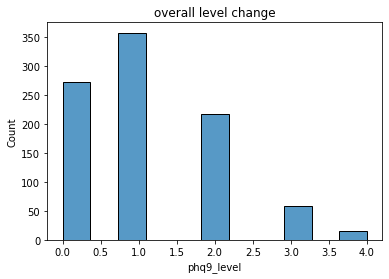

In [637]:
df_level_diff = (df_p9.groupby(['participant_id'])['phq9_level'].max() - df_p9.groupby(['participant_id'])['phq9_level'].min()).reset_index().sort_values(['phq9_level'])
df_level_diff
sns.histplot(data=df_level_diff, x="phq9_level").set(title='overall level change')


[Text(0.5, 1.0, 'level change weekly')]

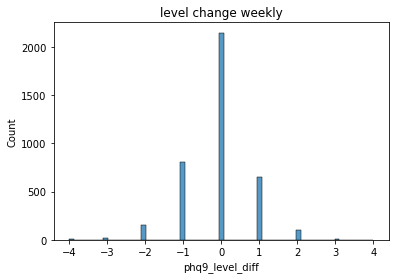

In [638]:
df_p9['phq9_level_diff'] = df_p9.groupby(['participant_id'])['phq9_level'].diff().reset_index()['phq9_level']
df_p9['phq9_sum_diff'] = df_p9.groupby(['participant_id'])['phq9_sum'].diff().reset_index()['phq9_sum']
sns.histplot(data=df_p9, x="phq9_level_diff").set(title='level change weekly')

In [639]:
df_p9_date[df_p9_date['participant_id'] == 'YELLOW-00263']
df_p9[df_p9['sum_phq9'] != df_p9['phq9_sum']]
(df_p9['sum_phq9'] - df_p9['phq9_sum']).value_counts()

 0.0    3013
 1.0     812
-1.0     645
 2.0     172
-2.0     103
 3.0      50
-3.0      22
dtype: int64

In [640]:
df_p9=df_p9.merge(df_p9_date, how = 'inner')
df_p9

,participant_id,week,sum_phq9,phq9Date,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,phq9_sum,phq9_level,phq9_level_diff,phq9_sum_diff
0,BLUE-00048,1,7,2014-08-08,0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,1,NaN,NaN
1,BLUE-00050,2,7,2014-08-23,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,2,NaN,NaN
2,BLUE-00050,3,4,2014-08-30,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1,-1.0,-3.0
3,BLUE-00050,4,5,2014-09-08,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1,0.0,1.0
4,BLUE-00050,6,5,2014-09-22,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,EN00155,5,10,2016-09-30,2,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,10.0,2,0.0,4.0
4787,ES00027,9,21,2016-12-11,3,1.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0,21.0,5,0.0,0.0
4788,EN00554,3,14,2016-11-28,2,2.0,3.0,3.0,1.0,1.0,2.0,0.0,0.0,14.0,3,0.0,2.0
4789,EN00225,3,3,2016-09-21,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1,0.0,0.0


<AxesSubplot:ylabel='Count'>

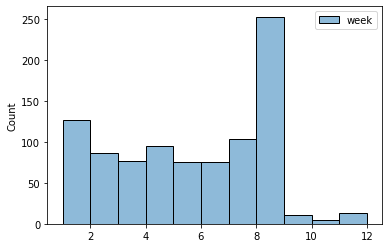

In [641]:
sns.histplot(df_p9.groupby(['participant_id'])['week'].count().reset_index())

In [569]:
df_p9[df_p9['participant_id'] == 'BLUE-00048'].sort_values(['week'])
# df_p9[df_p9['phq9_level'] == 0].sort_values(['week'])
# df_p9['phq9_level'].unique()
df_p9

,participant_id,week,sum_phq9,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,phq9_sum,phq9_level,phq9_level_diff
0,BLUE-00048,1,7.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,1,NaN
1,BLUE-00050,2,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,2,NaN
2,BLUE-00050,3,4.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1,-1.0
3,BLUE-00050,4,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1,0.0
4,BLUE-00050,6,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,YELLOW-00262,3,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,2,0.0
4778,YELLOW-00263,1,12.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,11.0,3,NaN
4779,YELLOW-00263,2,8.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,7.0,2,-1.0
4780,YELLOW-00263,3,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,2,0.0


In [659]:
# cols = ['phq9_1','phq9_2','phq9_3', 'phq9_4', 'phq9_5', 'phq9_6','phq9_7','phq9_8','phq9_9']
df = df_p9.merge(df_bp9, how = 'left', on = 'participant_id')

df

,participant_id,week,sum_phq9,phq9Date,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,...,base_phq9_4,base_phq9_5,base_phq9_6,base_phq9_7,base_phq9_8,base_phq9_9,study,base_baselinePHQ9date,base_phq9_sum,base_phq9_level
0,BLUE-00048,1,7,2014-08-08,0,1.0,1.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BLUE-00050,2,7,2014-08-23,1,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BLUE-00050,3,4,2014-08-30,1,0.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BLUE-00050,4,5,2014-09-08,1,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BLUE-00050,6,5,2014-09-22,1,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,EN00155,5,10,2016-09-30,2,2.0,2.0,1.0,1.0,0.0,...,3.0,3.0,2.0,3.0,2.0,0.0,Brighten-v2,2016-08-30,21.0,5.0
4787,ES00027,9,21,2016-12-11,3,1.0,3.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4788,EN00554,3,14,2016-11-28,2,2.0,3.0,3.0,1.0,1.0,...,3.0,2.0,2.0,3.0,2.0,0.0,Brighten-v2,2016-11-12,19.0,4.0
4789,EN00225,3,3,2016-09-21,1,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,Brighten-v2,2016-08-31,7.0,2.0


In [660]:
df.dropna(subset =['study','base_baselinePHQ9date'],inplace = True)
df = df.merge(df_bd,how = 'left', on = 'participant_id')

In [662]:
df.to_csv('demographics_phq9.csv')

## 4. passive_phone_communication_features_brighten_v2.csv


In [487]:
df_pmfb = pd.read_csv('passive_mobility_features_brighten_v2.csv')
df_pmfb

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
0,0,89660,58,EN00538,2016-11-14,0,True,6284.6,0.0,0.0,5420.4,8,0.783,0.0,9.733,0.000,11.750,6.833,1.517,-5.261
1,1,89661,58,EN00538,2016-11-15,0,True,15960.1,0.0,0.0,7120.3,24,1.733,0.0,0.133,0.000,20.133,3.833,2.117,-5.440
2,2,89662,58,EN00538,2016-11-16,0,True,4359.7,0.0,9656.3,3456.6,12,0.567,0.0,0.167,0.183,11.767,4.817,0.917,-4.209
3,3,89663,58,EN00538,2016-11-17,0,True,22387.9,0.0,1143.0,9809.7,16,2.583,0.0,0.200,0.050,25.883,17.900,2.467,-5.122
4,4,89664,58,EN00538,2016-11-18,0,True,45277.7,0.0,22332.9,5856.4,24,5.500,0.0,0.167,0.550,16.467,3.967,1.467,-4.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,17933,107593,66,EN05215,2016-11-25,1,False,10737.4,0.0,2685.7,0.0,2,0.783,0.0,5.567,0.083,0.000,0.000,0.000,-3.984
16786,17934,107594,66,EN05215,2016-11-26,2,True,3794.3,0.0,0.0,1844.3,7,0.350,0.0,2.683,0.000,10.717,4.667,0.383,-4.763
16787,17935,107595,66,EN05215,2016-11-27,2,True,1949.1,0.0,0.0,241.8,5,0.300,0.0,14.083,0.000,20.683,20.000,0.083,-5.478
16788,17936,107596,66,EN05215,2016-11-28,2,False,3113.3,0.0,5350.6,1241.7,5,0.350,0.0,0.250,0.183,27.117,27.117,0.267,-4.361


In [488]:
df_pmfb['participant_id'].nunique()

319

In [489]:

df_pmfb['dt_passive'].describe()

count          16790
unique           298
top       2016-11-15
freq             126
Name: dt_passive, dtype: object

In [492]:
df_pmfb['ROW_VERSION'].unique()

array([58, 59, 60, 61, 62, 63, 64, 65, 66])

In [34]:
df_g7 = pd.read_csv('gad7.csv') #anxiety
df_g7


,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_response,week,gad7_1,gad7_2,gad7_3,gad7_4,gad7_5,gad7_6,gad7_7,gad7_8,gad7_sum
0,0,4100,9,BLUE-00048,2014-08-01 10:59:30+00:00,3,1,0,1,1,0,0,0,0,3
1,1,4101,9,BLUE-00049,2014-08-01 16:31:13+00:00,1,1,0,1,1,0,1,1,1,6
2,2,4102,9,BLUE-00050,2014-08-09 02:30:10+00:00,1,1,1,1,1,1,1,1,0,7
3,3,4103,9,BLUE-00051,2014-08-05 17:34:20+00:00,1,1,1,1,1,1,1,0,1,7
4,4,4104,9,BLUE-00052,2014-08-04 21:27:28+00:00,0,3,3,3,3,3,3,3,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,815,4915,9,EN05331,2017-01-22 23:03:53+00:00,1,1,1,1,2,0,2,0,1,8
815,816,4916,9,EN05024,2016-09-03 21:10:38+00:00,2,2,3,0,3,0,1,2,0,11
816,817,4917,9,EN00322,2016-09-07 21:32:20+00:00,1,3,3,2,1,0,1,2,2,14
817,818,4918,9,EN05188,2016-11-10 03:25:51+00:00,1,3,3,1,1,3,1,1,1,14


In [65]:
print('unique week:',df_g7['week'].unique())

unique week: [ 3  1  0  2  4  6 14  8 11 10  5]


In [76]:
# df_g7.groupby(['participant_id'])['week'].nunique().unique()
df_g7.drop_duplicates(subset=['participant_id', 'week'],
                     keep='first', inplace=False)
# df_g7                

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_response,week,gad7_1,gad7_2,gad7_3,gad7_4,gad7_5,gad7_6,gad7_7,gad7_8,gad7_sum
0,0,4100,9,BLUE-00048,2014-08-01 10:59:30+00:00,3,1,0,1,1,0,0,0,0,3
1,1,4101,9,BLUE-00049,2014-08-01 16:31:13+00:00,1,1,0,1,1,0,1,1,1,6
2,2,4102,9,BLUE-00050,2014-08-09 02:30:10+00:00,1,1,1,1,1,1,1,1,0,7
3,3,4103,9,BLUE-00051,2014-08-05 17:34:20+00:00,1,1,1,1,1,1,1,0,1,7
4,4,4104,9,BLUE-00052,2014-08-04 21:27:28+00:00,0,3,3,3,3,3,3,3,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,815,4915,9,EN05331,2017-01-22 23:03:53+00:00,1,1,1,1,2,0,2,0,1,8
815,816,4916,9,EN05024,2016-09-03 21:10:38+00:00,2,2,3,0,3,0,1,2,0,11
816,817,4917,9,EN00322,2016-09-07 21:32:20+00:00,1,3,3,2,1,0,1,2,2,14
817,818,4918,9,EN05188,2016-11-10 03:25:51+00:00,1,3,3,1,1,3,1,1,1,14


In [10]:
df_ld = pd.read_csv('location_duration.csv') #

In [39]:
df_ld

,Unnamed: 0,Unnamed: 0.1,participant_id,date,category,duration
0,0,0,EN00033,2016-08-13,home,5699.0
1,1,1,EN00033,2016-08-13,none,23460.0
2,2,2,EN00033,2016-08-14,home,63239.0
3,3,3,EN00033,2016-08-14,none,0.0
4,4,4,EN00033,2016-08-15,home,44220.0
...,...,...,...,...,...,...
32027,34249,34249,ES05073,2017-03-20,home,360.0
32028,34250,34250,ES05073,2017-03-20,none,2220.0
32029,34251,34251,ES05073,2017-03-21,none,0.0
32030,34252,34252,ES05073,2017-03-22,home,26160.0


In [22]:
df_pce = pd.read_csv('Brigthen/passive_cluster_entries_brighten_v2.csv')

In [13]:
df_pce

NameError: name 'df_pce' is not defined

In [29]:
df_pce['subcategories'].unique()

array(['home', 'none', 'work', 'university', 'other',
       'real_estate_agency', 'dining_out', 'park', 'gym', 'church',
       'beauty_salon', 'health', 'furniture_store', 'clothing_store',
       'supermarket', 'department_store', 'atm', 'home_goods_store',
       'hardware_store', 'travel_agency', 'lodging', 'bar', 'school',
       'car_repair', 'bank', 'cafe', 'bakery',
       'beer_and_wine, sandwiches', 'liquor_store', 'transit_station',
       'lawyer', 'shoe_store', 'donuts, coffee', 'finance', 'store',
       'mosque', 'general_contractor', 'grocery_or_supermarket', 'spa',
       'accounting', 'museum', 'meal_takeaway', 'movie_theater', 'food',
       'book_store', 'laundry', 'shopping_mall', 'seafood, steak',
       'airport', 'moving_company', 'local_government_office',
       'veterinary_care', 'dentist', 'hair_care', 'jewelry_store',
       'hospital', 'electronics_store', 'meal_delivery', 'pizza',
       'gas_station', 'electrician', 'pet_store', 'cemetery',
       'car_

In [28]:
df_pce

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,week,cid,category,subcategories,time_in,time_out
0,0,1106943,459,EN00033,0,home,home,home,2016-08-13 08:23:00,2016-08-13 09:34:00
1,1,1106944,459,EN00033,0,xNot,none,none,2016-08-13 15:51:00,2016-08-13 22:22:00
2,2,1106945,459,EN00033,0,home,home,home,2016-08-13 23:36:00,2016-08-13 23:59:59
3,3,1106946,459,EN00033,0,home,home,home,2016-08-14 00:00:00,2016-08-14 15:04:00
4,4,1106947,459,EN00033,0,xNot,none,none,2016-08-14 19:43:00,2016-08-14 19:43:00
...,...,...,...,...,...,...,...,...,...,...
55855,59661,1166604,471,ES05073,8,home,home,home,2017-03-20 16:12:00,2017-03-20 16:18:00
55856,59662,1166605,471,ES05073,8,xNot,none,none,2017-03-21 16:05:00,2017-03-21 16:05:00
55857,59663,1166606,471,ES05073,8,home,home,home,2017-03-22 09:51:00,2017-03-22 17:07:00
55858,59664,1166607,471,ES05073,8,xNot,none,none,2017-03-22 20:44:00,2017-03-22 20:44:00


In [41]:
df_pmfb = pd.read_csv('Brigthen/passive_mobility_features_brighten_v2.csv')

In [90]:
df_pmfb

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_passive,cloud_cover_IQR,cloud_cover_mean,cloud_cover_median,cloud_cover_std,dew_point_IQR,...,dew_point_std,humidity_IQR,humidity_mean,humidity_median,humidity_std,precip_sum,temp_IQR,temp_mean,temp_median,temp_std
0,0,89743,68,EN00033,2016-08-13,0.12,0.09,0.00,0.13,2.02,...,1.06,0.27,0.69,0.67,0.13,0.00,14.48,87.93,88.45,6.63
1,1,89744,68,EN00033,2016-08-14,0.44,0.28,0.20,0.25,2.32,...,1.42,0.33,0.71,0.75,0.16,0.04,14.62,84.66,84.41,7.44
2,2,89745,68,EN00033,2016-08-15,0.71,0.36,0.22,0.35,2.54,...,1.43,0.32,0.77,0.81,0.16,0.51,16.34,80.30,77.27,8.20
3,3,89746,68,EN00033,2016-08-16,0.48,0.44,0.48,0.24,2.28,...,2.02,0.25,0.78,0.76,0.14,0.01,11.32,81.88,83.26,7.19
4,4,89747,68,EN00033,2016-08-17,0.31,0.45,0.49,0.23,0.74,...,0.72,0.32,0.75,0.78,0.17,0.49,12.69,81.10,81.12,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16859,18004,107747,77,ES05073,2017-03-17,0.06,0.03,0.00,0.05,8.26,...,4.22,0.47,0.65,0.71,0.23,0.00,20.31,56.10,57.46,11.34
16860,18005,107748,77,ES05073,2017-03-18,0.00,0.00,0.00,0.02,2.22,...,2.05,0.54,0.61,0.51,0.24,0.00,26.54,63.82,67.36,11.92
16861,18006,107749,77,ES05073,2017-03-20,0.11,0.08,0.00,0.15,2.62,...,2.44,0.38,0.67,0.73,0.20,0.00,17.80,61.70,62.55,10.42
16862,18007,107750,77,ES05073,2017-03-21,0.00,0.00,0.00,0.00,2.91,...,2.15,0.49,0.62,0.60,0.22,0.00,19.87,67.61,70.39,11.31


In [37]:
df_ppcfb = pd.read_csv('passive_phone_communication_features_brighten_v2.csv')

In [38]:
df_ppcfb

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_passive,week,callDuration_incoming,callDuration_outgoing,callCount_incoming,callCount_missed,...,textCount_received,textCount_sent,textLength_received,textLength_sent,uniqueNumbers_calls_incoming,uniqueNumbers_calls_missed,uniqueNumbers_calls_outgoing,uniqueNumbers_texts,uniqueNumbers_texts_received,uniqueNumbers_texts_sent
0,0,33846,22,EN00066,2016-08-24,1,0,0,0,0,...,53,32,2954,2278,0,2,0,0,6,4
1,1,33847,22,EN00066,2016-08-25,1,340,0,0,0,...,189,136,10979,10306,1,0,0,0,15,12
2,2,33848,22,EN00066,2016-08-26,1,0,326,0,0,...,247,151,14748,8056,0,5,3,0,11,8
3,3,33849,22,EN00066,2016-08-27,1,0,1681,0,0,...,251,193,12864,10158,0,1,3,0,13,12
4,4,33850,22,EN00066,2016-08-28,1,0,449,0,0,...,82,52,4019,3194,0,0,1,0,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1954,35800,22,ES05060,2017-03-17,10,2065,3,0,0,...,0,0,0,0,1,1,2,0,0,0
1901,1955,35801,22,ES05060,2017-03-20,11,0,0,0,0,...,1,0,223,0,0,0,0,0,1,0
1902,1956,35802,22,ES05060,2017-03-21,11,763,88,0,0,...,0,0,0,0,1,1,1,0,0,0
1903,1957,35803,22,ES05060,2017-03-24,11,0,497,0,0,...,0,0,0,0,0,1,1,0,0,0


In [35]:
df_pwfb = pd.read_csv('passive_weather_features_brighten_v2.csv')
# real judge of just how "dry" or "humid" it will feel outside, look at the dew point instead of the RH. The higher the dew point, the muggier it will feel.

In [36]:
df_pwfb

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_passive,cloud_cover_IQR,cloud_cover_mean,cloud_cover_median,cloud_cover_std,dew_point_IQR,...,dew_point_std,humidity_IQR,humidity_mean,humidity_median,humidity_std,precip_sum,temp_IQR,temp_mean,temp_median,temp_std
0,0,89743,68,EN00033,2016-08-13,0.12,0.09,0.00,0.13,2.02,...,1.06,0.27,0.69,0.67,0.13,0.00,14.48,87.93,88.45,6.63
1,1,89744,68,EN00033,2016-08-14,0.44,0.28,0.20,0.25,2.32,...,1.42,0.33,0.71,0.75,0.16,0.04,14.62,84.66,84.41,7.44
2,2,89745,68,EN00033,2016-08-15,0.71,0.36,0.22,0.35,2.54,...,1.43,0.32,0.77,0.81,0.16,0.51,16.34,80.30,77.27,8.20
3,3,89746,68,EN00033,2016-08-16,0.48,0.44,0.48,0.24,2.28,...,2.02,0.25,0.78,0.76,0.14,0.01,11.32,81.88,83.26,7.19
4,4,89747,68,EN00033,2016-08-17,0.31,0.45,0.49,0.23,0.74,...,0.72,0.32,0.75,0.78,0.17,0.49,12.69,81.10,81.12,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16859,18004,107747,77,ES05073,2017-03-17,0.06,0.03,0.00,0.05,8.26,...,4.22,0.47,0.65,0.71,0.23,0.00,20.31,56.10,57.46,11.34
16860,18005,107748,77,ES05073,2017-03-18,0.00,0.00,0.00,0.02,2.22,...,2.05,0.54,0.61,0.51,0.24,0.00,26.54,63.82,67.36,11.92
16861,18006,107749,77,ES05073,2017-03-20,0.11,0.08,0.00,0.15,2.62,...,2.44,0.38,0.67,0.73,0.20,0.00,17.80,61.70,62.55,10.42
16862,18007,107750,77,ES05073,2017-03-21,0.00,0.00,0.00,0.00,2.91,...,2.15,0.49,0.62,0.60,0.22,0.00,19.87,67.61,70.39,11.31


In [50]:
df_p2 = pd.read_csv('Brigthen/phq2.csv')
df_p2

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_response,week,dt_yesterday,day,phq2_1,phq2_2,phq2_sum
0,0,143928,37,BLUE-00048,2014-08-01 19:27:42+00:00,3,2014-07-31,0,2.0,1.0,3.0
1,1,143929,37,BLUE-00048,2014-08-02 15:13:09+00:00,4,2014-08-01,1,3.0,3.0,6.0
2,2,143930,37,BLUE-00048,2014-08-04 03:58:23+00:00,4,2014-08-03,2,1.0,1.0,2.0
3,3,143931,37,BLUE-00048,2014-08-04 16:53:04+00:00,4,2014-08-03,3,2.0,2.0,4.0
4,4,143932,37,BLUE-00048,2014-08-07 14:25:30+00:00,4,2014-08-06,6,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
47452,47971,191899,48,EN00127,2016-09-21 18:23:08+00:00,4,2016-09-20,10,2.0,1.0,3.0
47453,47972,191900,48,EN00561,2017-02-02 12:41:10+00:00,12,2017-02-01,81,2.0,2.0,4.0
47454,47973,191901,48,EN00620,2017-01-04 22:53:33+00:00,8,2017-01-03,50,1.0,1.0,2.0
47455,47974,191902,48,EN00588,2016-12-15 03:58:53+00:00,5,2016-12-14,32,3.0,2.0,5.0


In [88]:
df_p2['participant_id'].value_counts()
df_p2['day'].describe()
#they did not take the test every day

count    47457.000000
mean        43.837010
std         34.799815
min          0.000000
25%         16.000000
50%         38.000000
75%         65.000000
max        294.000000
Name: day, dtype: float64

In [80]:
df_p2.drop_duplicates(subset=['participant_id', 'dt_response'],
                     keep='first', inplace=False)

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_response,week,dt_yesterday,day,phq2_1,phq2_2,phq2_sum
0,0,143928,37,BLUE-00048,2014-08-01 19:27:42+00:00,3,2014-07-31,0,2.0,1.0,3.0
1,1,143929,37,BLUE-00048,2014-08-02 15:13:09+00:00,4,2014-08-01,1,3.0,3.0,6.0
2,2,143930,37,BLUE-00048,2014-08-04 03:58:23+00:00,4,2014-08-03,2,1.0,1.0,2.0
3,3,143931,37,BLUE-00048,2014-08-04 16:53:04+00:00,4,2014-08-03,3,2.0,2.0,4.0
4,4,143932,37,BLUE-00048,2014-08-07 14:25:30+00:00,4,2014-08-06,6,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
47452,47971,191899,48,EN00127,2016-09-21 18:23:08+00:00,4,2016-09-20,10,2.0,1.0,3.0
47453,47972,191900,48,EN00561,2017-02-02 12:41:10+00:00,12,2017-02-01,81,2.0,2.0,4.0
47454,47973,191901,48,EN00620,2017-01-04 22:53:33+00:00,8,2017-01-03,50,1.0,1.0,2.0
47455,47974,191902,48,EN00588,2016-12-15 03:58:53+00:00,5,2016-12-14,32,3.0,2.0,5.0


In [58]:
df_p9 = pd.read_csv('Brigthen/phq9.csv')
df_p9.groupby(['participant_id'])['week'].count().max()

18

In [59]:
df_p9['week'].max()

12

In [78]:
df_p9.drop_duplicates(subset=['participant_id', 'week'],
                     keep='first', inplace=False)

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,week,sum_phq9,phq9Date,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9
0,0,1,1,BLUE-00048,1,7,2014-08-08,0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
1,1,2,1,BLUE-00050,2,7,2014-08-23,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,2,3,1,BLUE-00050,3,4,2014-08-30,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,3,4,1,BLUE-00050,4,5,2014-09-08,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,4,5,1,BLUE-00050,6,5,2014-09-22,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,4870,4871,2,EN00155,5,10,2016-09-30,2,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0
4813,4871,4872,2,ES00027,9,21,2016-12-11,3,1.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0
4814,4872,4873,2,EN00554,3,14,2016-11-28,2,2.0,3.0,3.0,1.0,1.0,2.0,0.0,0.0
4815,4873,4874,2,EN00225,3,3,2016-09-21,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [91]:
df_p9.describe()


,Unnamed: 0,ROW_ID,ROW_VERSION,week,sum_phq9,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9
count,4817.000000,4817.000000,4817.000000,4817.000000,4817.000000,4817.000000,4816.000000,4814.000000,4814.000000,4814.000000,4813.000000,4811.000000,4810.000000,4809.000000
mean,2414.748599,2415.748599,1.444675,5.166286,9.541831,1.172929,1.234842,1.406938,1.514749,1.179684,1.070434,1.035544,0.480873,0.371387
std,1400.527571,1400.527571,0.496981,3.475107,5.808614,0.803200,0.828791,1.010007,0.932642,1.015931,0.964361,0.938540,0.780925,0.726361
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1204.000000,1205.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2408.000000,2409.000000,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,3612.000000,3613.000000,2.000000,8.000000,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,4874.000000,4875.000000,2.000000,12.000000,27.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [649]:
df_bd

,participant_id,working,income_satisfaction,income_lastyear,age,startdate,study,gen_Female,gen_Male,martial_Married/Partner,...,edu_None,edu_University,race_African-American/Black,race_American Indian/Alaskan Native,race_Asian,race_Hispanic/Latino,race_More than one,race_Native Hawaiian/other Pacific Islander,race_Non-Hispanic White,race_Other
213,EN00033,1.0,3.0,6.0,52.0,2016-08-12 12:41:00,Brighten-v2,0,1,0,...,0,1,0,0,0,0,0,0,1,0
214,EN00034,1.0,3.0,4.0,32.0,2016-08-12 12:58:00,Brighten-v2,1,0,1,...,0,1,0,0,0,0,0,0,1,0
215,EN00035,0.0,2.0,2.0,57.0,2016-08-12 15:41:00,Brighten-v2,0,1,0,...,0,1,0,0,0,0,0,0,1,0
216,EN00036,1.0,3.0,3.0,55.0,2016-08-13 10:24:00,Brighten-v2,1,0,1,...,0,1,0,0,0,0,0,0,1,0
217,EN00037,0.0,2.0,6.0,34.0,2016-08-15 09:04:00,Brighten-v2,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,ES05078,0.0,2.0,4.0,38.0,2017-01-23 10:48:00,Brighten-v2,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1277,ES05079,0.0,2.0,1.0,31.0,2017-01-23 19:39:00,Brighten-v2,0,1,1,...,0,1,0,0,0,1,0,0,0,0
1278,ES05080,1.0,1.0,1.0,32.0,2017-01-29 20:45:00,Brighten-v2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1279,ES05081,0.0,1.0,1.0,33.0,2017-02-01 05:52:00,Brighten-v2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
